In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [32]:
# Read the csv file into a pandas DataFrame

wk1 = pd.read_csv('wk1.csv')
wk1.head()

,STORE #,LATITUDE,LONGITUDE,STATE,ZIP CODE,FOOTAGE,2017 DOLLARS,2018 DOLLARS,2019 DOLLARS
0,13838,21.4940,-158.0291,HI,96786,9,55753.11,49074.18,23398.58
1,15531,21.3770,-158.0248,HI,96797,9,14351.40,15266.11,9027.49
2,15146,21.3266,-158.0229,HI,96706,9,59474.44,57063.93,27395.19
3,12742,21.3168,-157.8554,HI,96817,9,93348.84,87593.06,43031.39
4,13972,21.3019,-157.8445,HI,96814,12,98029.68,85538.64,40041.74


In [33]:
# Assign the data to X and y

X = wk1[["FOOTAGE","2017 DOLLARS", "2018 DOLLARS"]]
y = wk1["2019 DOLLARS"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4827, 3) (4827, 1)


In [34]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [35]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [36]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9869134801723329
Testing Score: 0.9860039033827843


Text(0.5, 1.0, 'Residual Plot')

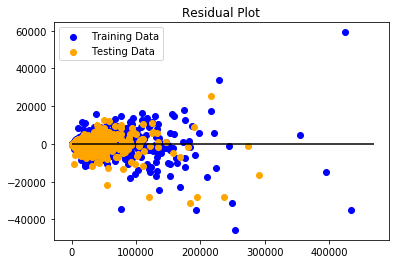

In [37]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from sklearn import preprocessing
#from sklearn import utils
#%matplotlib inline
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd

#import numpy as np
#from sklearn import linear_model
#from sklearn import svm

#classifiers = [
#    svm.SVR(),
#    linear_model.SGDRegressor(), 
#   linear_model.BayesianRidge(),
#    linear_model.LassoLars(),
#    linear_model.ARDRegression(),
#    linear_model.PassiveAggressiveRegressor(),
#    linear_model.TheilSenRegressor(),
#    linear_model.LinearRegression()]

wk1 = pd.read_csv('wk1.csv')
wk1.head()




,STORE #,LATITUDE,LONGITUDE,STATE,ZIP CODE,FOOTAGE,2017 DOLLARS,2018 DOLLARS,2019 DOLLARS
0,13838,21.4940,-158.0291,HI,96786,9,55753.11,49074.18,23398.58
1,15531,21.3770,-158.0248,HI,96797,9,14351.40,15266.11,9027.49
2,15146,21.3266,-158.0229,HI,96706,9,59474.44,57063.93,27395.19
3,12742,21.3168,-157.8554,HI,96817,9,93348.84,87593.06,43031.39
4,13972,21.3019,-157.8445,HI,96814,12,98029.68,85538.64,40041.74


In [39]:
X = wk1[["FOOTAGE","2017 DOLLARS","2018 DOLLARS"]]
y = wk1["2019 DOLLARS"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4827, 3) (4827, 1)


In [40]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()



,FOOTAGE,2017 DOLLARS,2018 DOLLARS
4695,12,26188.65,26018.91
4031,12,101205.83,92374.34
4064,12,27557.60,25250.08
2211,12,68293.87,61007.28
2093,12,19025.90,17530.82


In [41]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [42]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [43]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

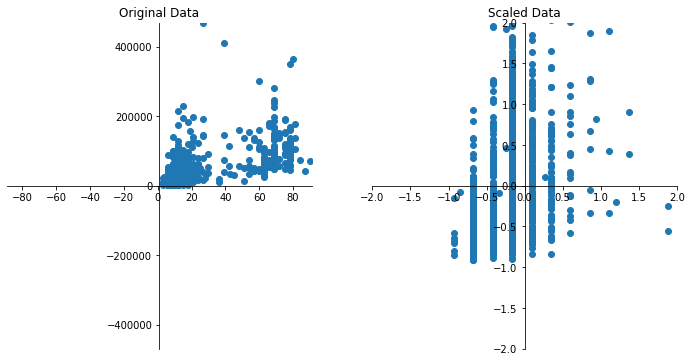

In [44]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["FOOTAGE"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["FOOTAGE"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [45]:
#clf = KNeighborsClassifier(n_neighbors=5)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

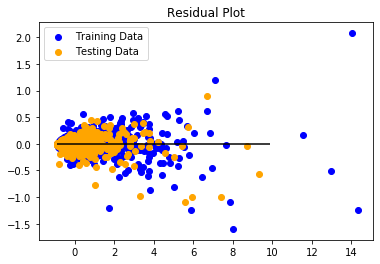

In [48]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.012997523038562254, R2: 0.9860039033827844


In [50]:
X = wk1[["FOOTAGE","2017 DOLLARS","2018 DOLLARS"]]
y = wk1["2019 DOLLARS"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4827, 3) (4827, 1)


In [51]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [52]:
#clf.fit(X_train, np.ravel(y_train))
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_scaled, y_train)
# train_score = knn.score(X_train_scaled, y_train)
# test_score = knn.score(X_test_scaled, y_test)
# train_scores.append(train_score)
# test_scores.append(test_score)
# print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
# plt.plot(range(1, 20, 2), train_scores, marker='o')
# plt.plot(range(1, 20, 2), test_scores, marker="x")
# plt.xlabel("k neighbors")
# plt.ylabel("Testing accuracy Score")
# plt.show()
print(type(y_train))

<class 'numpy.ndarray'>


In [53]:
#clf.fit(X_train, np.ravel(y_train))
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

ValueError: Unknown label type: 'continuous'

In [54]:
#clf.predict(X_test)

#clf.fit(X_train, np.ravel(y_train))

In [55]:
predictions = clf.predict(X_test)
print("Test set predictions:{}".format(predictions))
        
accuracy = clf.score(X_test, y_test)
print("Test set accuracy:{:.2f}").format(accuracy)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

wk1 = pd.read_csv('wk1.csv')
wk1.head()

f1=wk1['FOOTAGE'].values
f2=wk1['2019 DOLLARS'].values
x = np.array(list(zip(f1,f2)))

#pd.wk1(['123', '42']).astype(float)

#f1=wk1[["FOOTAGE","2017 DOLLARS", "2018 DOLLARS"]].values
#f2=wk1["2019 DOLLARS"].values
#x = np.array(list(zip(f1,f2))))

k = 2

C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y,)), dtype=np.float32)

plt.scatter(f1, f2, c='#050505', s=20)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
plt.xlabel("Footage")
plt.ylabel("2019 Dollars")
plt.title("Footage and 2019 Dollars")

kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

colors = ['r', 'g', 'b', 'y','c','m','o','w']
fig2 = plt.figure()
kx = fig2.add_subplot(111)

for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if labels[j]]== i)
    kx.scatter(points[:0,], points[:,1], s=20, cmap='rainbow')
    kx.scatter(centroids[:0], centroids[:,1], marker='*', s=200, c='#050505')
    print("final centroids")
    print(centroids)

TypeError: cannot convert the series to <class 'int'>